In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

# 第27章 配對交易策略

## 27.1 什麼是配對交易？

在單邊做多的市場行情中，投資者的資產收益往往易受到市場波動較大的影響。在非理性的巿場中，這種波動所帶來的風險尤其難以規避。

配對交易（Pairs Trading）思想為這種困境提供了一種既能避險又盈利的策略，其又被稱之為價差交易或者統計套利交易[<sup>6</sup>](#fn6)，是一種風險小、收益較穩定的市場中性策略。一般的作法，是在市場中搜尋兩支歷史價格走勢有對沖效果的股票，組成配對，使得股票配對的價差（Spreads）大致在一個範圍內波動。一種可能的作業方式是，當股票配對價差正向偏離時，因預計價差在未來會回復，做空價格走勢強勢的股票同時做多價格走勢較弱的股票。當價差收斂到長期正常水平時，即走勢較強的股票價格回落，或者走勢較弱的股票價格轉強，平倉賺取價差收斂時的收益；當股票配對價差負向偏離時，反向建倉，價差增回至正常範圍時再平倉，同樣也可賺取收益。

<span id="fn6"><sup>6</sup> 統計套利交易不僅限於配對交易</span>

圖 27.1：昆盈與仲琦科技價格走勢圖

觀察圖 27.1 中仲琦科技與昆盈在年價格走勢曲線，昆盈股價曲線圖與仲琦科技曲
線圖的整體走勢大致相同，可以建構配對交易策略。

## 27.2 配對交易的思想

配對交易投資者甚少關注單支股票價格的絕對高低，也不受股票市場的走勢方向左右；其投資標的在於股票對的價差，挑揀出價格差異長期穩定，並且可能有機會被高估或被低估的股票對，抓取價差擴張再收斂而產生的波動收益。多空配對的投資組合減低了整體股市未來走勢不確定的市場風險，其主要風險來自於配對股票未來發展的不確定性。因此，多空部位同時建倉的配對交易策略被視為一種巿場中性策略。

配對交易的思想最早起源於 20 世紀 20 年代，華爾街交易員 Jesse Lauriston Livermore。在投資實戰中採用的姐妹對（Sister Stocks）交易策略。他發現兩支同行業內業務相似的股票，其價格波動趨勢有某種規律，即兩者的價差會構成一種均衡關係。若在兩支股票價格偏離較大時建倉，價差回復時平倉，便會賺取價差由發散至收斂帶來的收益。隨著數理金融學和電腦技術的不斷發展，到了 20 世紀 80 年代；配對交易策略在華爾街得到很大關注。1985 年，華爾街投資銀行摩根士丹利（Morgan Stanley）的天體物理學家努齊奧．塔塔裡亞（Nunzio Tartaglia）組建了一個由著名物理學家、資訊科學學家和數學家構成的數量化分析團隊，該團隊以數學模型計算股票買賣組合，並開發電腦自動交易程式，在當時華爾街投資實戰中大獲成功。該程式運用的買賣組合策略即是配對交易策略，與傳統的主觀技術分析不同，摩根士丹利的交易程式對於股票對的選取、交易參數的設定、與交易規則的制定，都採取量化分析的手段並由電腦程式自動完成，自此以後，這種量化投資策略逐漸廣為人知並流傳開來。時至今日，配對交易已經衍生出眾多模型和交易規則，並為各種避險基金和股票投資者使用。

關於配對交易的學術研究也不勝枚舉，在此舉幾篇有趣的文章供讀者參照。Gatev，Goetzmann和Rouwenhorst (1999)[<sup>7</sup>](#fn7) 對 1962 年 6 月到 1997 年 12 月的美國股市進行配對交易研究，他們採用最小距離法搜尋歷史價格最近的 20 組股票對，得到每一配對的標準化股票價差 ($\hat{p}$)。進場交易的時機為標準化價差 $\hat{p}$ 超過兩倍標準差 ($\sigma_\hat{p}$)，即 $\hat{p}>2\sigma_{\hat{p}}$ 之時；運用買進低價股賣出高價股的策略，年化報酬率可達到 11% 以上。Hong and Susmel (2003)[<sup>8</sup>](#fn8) 選取亞洲 64 支股票與其在美國掛牌之 ADRs，以相對價值為交易指標，在 1991 年第一季到 2000 年最後一季中，分別以 3、6、12 個月作為交易期間，結果，隨著持有期間由 3 個月増加到 12 個月，年化報酬亦從 8.5 %上升到 33.8 %。Vidyamurthy (2004)[<sup>9</sup>](#fn9) 把共整合理論運用到配對交易的股票對選取中，並將定態性作為配對好壞的判斷標準。從股票基本面或歷史資料挑揀出潛在具有共整合關係之配對股票，並以共整合係數及均衡值兩種指標來建構兩種股票價格之線性關係。而 Agarwal，Madhogaria 等 (2004)[<sup>10</sup>](#fn10) 在跨產業股票池中，先用各股價之平均數與標準差將股票價格標準化，再以標準化價格相關係數高的股票配對，隨後構造交易指標.以交易指標偏離其歷史平均值的程度來判斷交易進出時機，該文章發現在 2004 年 10 月 11 日到 2004 年 12 月 3 日這 55 個交易日中，配對交易策略的平均年化報酬為 7.17%。

<span id="fn7"><sup>7</sup> Gatev, Evan G., Goetzmann, William and Rouwenhorst, K., (1999).Pairs Trading: Performance of a Relative Value Arbitrage Rule, No 7032, NBER Working Papers, National Bureau of Economic Research, Inc.</span>

<span id="fn8"><sup>8</sup> Hong, Gwangheon, and Raul Susmel. "Pairs-trading in the Asian ADR market." University of Houston, Unpublished Manuscript (2003).</span>

<span id="fn9"><sup>9</sup> Vidyamurthy, Ganapathy. Pairs Trading: quantitative methods and analysis. Vol. 217. John Wiley & Sons, 2004.</span>

<span id="fn10"><sup>10</sup> Agarwal, Nikesh, Vikash Madhogaria, and Supreena Narayanan. Simulated Trading-Analysis of Pairs Trading. No. 0412018. EconWPA, 2004.</span>

## 27.3 配對交易的步驟

配對交易策略的時期分為形成期（Formation Period）和交易期（Trading Period）。在形成期挑揀歷史價格走勢存在規律的股票對，並制定交易策略；在交
易期模擬開倉平倉交易，而後計算收益。在整個配對交易策略過程中，我們需要考
慮以下問題：

1. 如何挑揀進行配對的股票？

2. 挑揀好股票對以後，如何制定交易策略？開倉點如何設計？

3. 開倉時，兩支股票如何進行多空倉配比？

接下來，我們分別闡述解決這些問題。

### 27.3.1 股票對的選取

配對交易的第一步是要在形成期搜尋歷史價差走勢大致穩定的股票對。當前據統計，2016 年台灣上市公司共有 892 家，若要對這 892 支股票兩兩配對，則一共可以配出 397832 個股票對。如果要從這 397832 個股票對中，挑揀出歷史價差走勢穩定的股票對，勢必耗費不少計算資源。折衷的方法是將市場劃分為多個子空間分別進行檢索[<sup>11</sup>](#fn11)。下面介紹幾種子空間配對的方法。

1. 行業內符合
選取同行業公司規模相近的股票進行配對，例如對銀行業的上市公司股票進行兩兩配對。

2. 產業鏈配對
桹據產業鏈，將同一條產業鏈內的上巿公司股票進行配對，例如某一手機生產公司與其上游手機攝像頭生產公司進行配對。

<span id="fn11"><sup>11</sup> 劃分子空間固然省時，卻不免有顧此失彼之慮。</span>

3. 財務管理配對
從基本面分析的角度切入，挑揀上市公司市盈率、負債率、產品種類等相近的股票進行配對，進而減少一些不必要的搜索成本。

此外，台灣中型 100 指數、台灣 50 指數等指數的成分股票也可以作為配對交易的股票池。

運用定性分析的手段，初步挑揀好配對的股票池以後，在配對池眾多股票對中，如何運用定量的方法，來挑揀可以用於配對交易的股票對？最小距離法和共整合方法是常用的兩種方法。

**最小距離法**

配對交易的一個選取標準，在於搜尋歷史價價差穩定的股票對。為了客觀衡量兩支股票價格的距離，首先需對股票價格進行標準化處理。假設 $P_t^i(t=0,1,2,...,T）$ 表示股票 $i$ 在第 $t$ 天的價格。那麼，股票 $i$ 的在第 $t$ 天的單期收益率可表達為：

$$r_t=\frac{P_t^i-P_{t-1}^i}{P_{t-1}^i},\quad t=1,2,3,...,T$$

用 $\hat{P}_t^i$ 表示股票 $i$ 在第 $t$ 天的標準化價格，學界和業界認為 $\hat{P}_t^i$ 可由這 $t$ 天內的累積收益率來計算，即

$$\hat{P}_t^i=\prod_{\tau=1}^t(1+r_\tau^i）$$

標準化價格也就是可以用當期價格除以期初價格來計算得到。

$$\hat{P}_t^i=\frac{P_t^i}{P_0^i}$$

假設有股票 $X$和股票 $Y$，則我們可以計算二者之間的標準化價格偏差之平方和 $\mathit{SSD}_{X,Y}$

$$\mathit{SSD}_{X,Y}=\sum_{t=1}^T(\hat p_t^X-\hat p_t^Y)^2$$

接下來，我們挑揀昆盈和仲琦科技股票從 2014 年 1 月 1 日到 2014 年 12 月 31 日的價格資料，示範如何以 Python 計算 SSD。

1. 讀取昆盈和仲琦科技股票從 2014 年 1 月 1 日到 2014 年 12 月 31 日的價格資料。

            Close   Open   High    Low  Volume     ROI
Date                                                  
2014-01-02  10.47  10.47  10.52  10.35     733  0.4098
2014-01-03  10.56  10.52  10.69  10.39    2180  0.8163
2014-01-06  10.56  10.60  10.64  10.43     729  0.0000
2014-01-07  10.60  10.56  10.77  10.56    1879  0.4049
2014-01-08  10.64  10.69  10.77  10.60    1760  0.4032
            Close   Open   High    Low  Volume     ROI
Date                                                  
2014-01-02  14.40  14.04  14.49  14.04    2612  2.5806
2014-01-03  14.22  14.13  14.35  14.13    1138 -1.2579
2014-01-06  14.04  14.22  14.35  13.99    1372 -1.2739
2014-01-07  14.31  14.04  14.40  14.04    2741  1.9355
2014-01-08  14.40  14.40  14.67  14.31    3891  0.6329


248

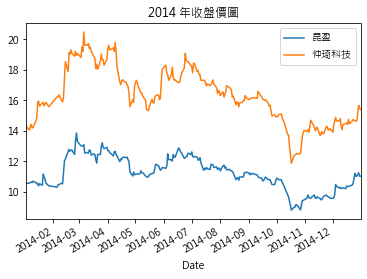

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

# 獲取昆盈股價數據
KYE=pd.read_csv('.\\PythonBook_code_data\\part4\\027\\2365.CSV',sep='\t',index_col='Date')
KYE.index=pd.to_datetime(KYE.index)

# 獲取仲琦科技股價數據
Hitron=pd.read_csv('.\\PythonBook_code_data\\part4\\027\\2419.csv',sep='\t',index_col='Date')
Hitron.index=pd.to_datetime(Hitron.index)

# 定義配對形成期（formation period）
formStart='2014-01-01'
formEnd='2015-01-01'
KYEf=KYE[formStart:formEnd]
Hitronf=Hitron[formStart:formEnd]
print(KYEf.head())

print(Hitronf.head())

# 將兩支股票收盤價資料合在一起形成 DataFrame
pairf=pd.concat([KYEf.Close,Hitronf.Close],axis=1)
pairf.columns=['昆盈','仲琦科技']
len(pairf)

pairf.plot(title='2014 年收盤價圖')

2. 構造標準化價格之差平方累積 SSD 函數,並計算仲琦科技與昆盈標準化價格的距離。

In [3]:
def SSD(priceX,priceY):
    if priceX is None or priceY is None:
        print('缺少價格序列。')
    standardX=priceX/priceX[0]
    standardY=priceY/priceY[0]
    SSD=np.sum((standardX-standardY)**2)
    return(SSD)

KYEf = pairf['昆盈']
Hitronf = pairf['仲琦科技']
dis=SSD(KYEf,Hitronf)
dis

1.3364442848421572

**共整合模型**

另一種常用選取配對交易股票對的方法，是選取兩支股票價格序列存在共整合關係的股票對。金融資產的對數價格一般可以視為一階整合序列。用 $P_t^X$ 表示 $X$ 股票在第 $t$ 日的價格，如果 $X$ 股票的對數價格 $\{\log(P_t^X)\}(t=0,1,2,...,T)$ 是非定態時間序列，且 $\{\log(P_t^X)—log(P_{t-1}^X)\},(t=1,2,...,T)$，構成的時間序列是定態的，則稱 $X$ 股票的對數價格 $\{\log(P_t^X)\},(t=1,2,...,T)$，是一階整合序列，而 $X$ 股票對數價格的差分序列可表達如下：

$$\log(P_t^X)-\log(P_{t-1}^X)=\log\left(\frac{P_t^X}{P_{t-1}^X}\right)$$

又 $X$ 股票在 $t$ 期的單期簡單收益率：
$$
\begin{split}
r_t^X&=\frac{P_t^X-P_{t-1}^X}{P_{t-1}^X}\\
&=\frac{P_t^X}{P_{t-1}^X}-1
\end{split}
$$

則

$$
\begin{split}
\log(P_t^X)-\log(P_{t-1}^X)&=\log(\frac{P_t^X}{P_{t-1}^X})\\
\log(1+r_t^X)\\
\approx r_t^X
\end{split}
$$

即 $X$ 股票的簡單單期收益率序列 $\{r_t^X\}$ 是定態的。

要判斷兩支股票的歷史價格是否具有共整合關係，需要先檢定兩支股票的對數價格序列是否是一階整合序列，或者說先檢定兩支股票的收益率序列 $\{r_t\}$ 是否是定態性時間序列。

接下來、我們分別對昆盈和仲琦科技對數價格資料進行一階整合檢定。arch 套件的 ADF() 函數可以使用 ADF 單根方法對序列的定態性進行檢定，ADF 單根檢定的虛無假設是「序列存在單根」，如果我們無法拒絕虛無假設，則說明我們檢查的序列可能存在單根，序列是非定態的；如果我們拒絕虛無假設，則序列不存在單根，即序列是定態性時問序列。

In [4]:
# 滙入 ADF 函數和 numpy 套件
from arch.unitroot import ADF
import numpy as np

## 檢定昆盈對數價格的一階整合性
# 將昆盈股價取對數
KYEflog=np.log(KYEf)
adfA=ADF(KYEflog)
print(adfA.summary().as_text())

# 將昆盈股票的對數價格差分
retA=KYEflog.diff()[1:]
adfretA=ADF(retA)
print(adfretA.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.738
P-value                         0.412
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                -14.404
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


summary() 函數可以傳回 ADF() 函數進行單根檢定的詳盡計算結果。Test Statistic 是 ADF 檢定的統計量計算結果，Critical Values 是該統計量在虛無假設下的 1%、5% 和 10% 分位數。對昆盈的對數價格 KYEflog 進行單根檢定，結果為「Test Statistic: -1.738」，而「Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)」，也就是說 -1.738 大於虛無假設分佈下的 1%、5% 和 10% 分位數，從而無法拒絕虛無假設，進而說明昆盈的對數價格是非定態的，其對數價格的差分（收益率）單根簡單 $t$ 值為 -14.404，小於 -3.46，則表明無法接受虛無假設，進而說明昆盈的對數價格的差分（收益率）序列是定態性時間序列。

按照同樣的分析思路，我們再對仲琦科技的對數價格進行一階整合檢定。

In [5]:
# 對仲琦科技價格取對數
# 對數價格單根檢定
Hitronflog=np.log(Hitronf)
adfB=ADF(Hitronflog)
print(adfB.summary().as_text())

# 對仲埼科技對數價格進行差分
retB=Hitronflog.diff()[1:]
adfretB=ADF(retB)
print(adfretB.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.715
P-value                         0.423
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                -14.824
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


仲琦科技的對數價格序列 Test Statistic 為 -1.715，大於 -2.57，進而無法拒絕虛無假設，則說明仲琦科技的對數價格序列是非定態的。對仲琦科技的對數價格的差分 retA 變數進行單根檢定，Test Statistic 為 -14.824，大於 -3.46，進而無法接受虛無假設，即仲琦科技的對數價格的差分不存在單根，是定態的。綜合以上所述，說明仲琦科技的對數價格差分（收益率）序列是一階整合序列。

Text(0.5, 1.0, '昆盈與仲琦科技的對數價格時序圖')

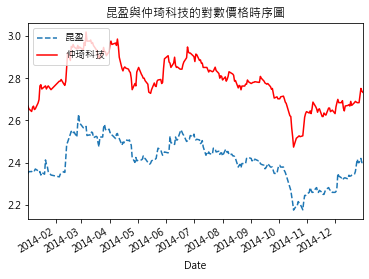

In [6]:
KYEflog.plot(label='昆盈',style='--')
Hitronflog.plot(label='仲琦科技',style='r-')
plt.legend(loc='upper left')
plt.title('昆盈與仲琦科技的對數價格時序圖')
plt.show()

圖 27.2：昆盈與仲琦科技的對數價格時序圖

觀察圖 27.2 上虛線和實線，可以看出仲琦科技股票的對數價格與昆盈股票的對數價格有一定的趨勢，不是定態的。

Text(0.5, 1.0, '昆盈與仲琦科技的對數價格差分(收益率)時序圖')

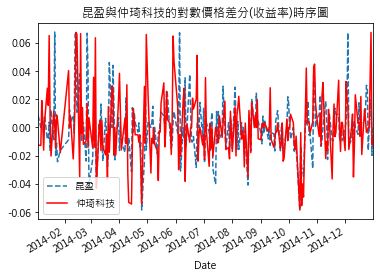

In [7]:
# 繪製股票對數價格差分的時序圖
retA.plot(label='昆盈',style='--')
retB.plot(label='仲琦科技',style='r-')
plt.legend(loc='lower left')
plt.title('昆盈與仲琦科技的對數價格差分(收益率)時序圖')
plt.show()

圖 27.3：昆盈與仲琦科技的對數價格差分的時序圖

從圖 27.3 中可以看出，昆盈與仲琦科技的股票對數價格的差分序列是定態的，整體上都在 0 附近上下波動。假設 $\{log(P_t^X)\},(t=1,2,...,T)$ 和 $\{log(P_t^Y)\},(t=1,2,...,T)$，分別表示 $X$ 股票和 $Y$ 股票的對數價格序列，則 Engle 和 Granger 兩步法可以對時間序列 $\{log(P_t^X)\}$ 和 $\{log(P_t^Y)\}$ 共整合關係進行檢定。在 $\{log(P_t^X)\}$ 和 $\{log(P_t^Y)\}$ 都是一階整合的前提下，用最小平方法構造迴歸方程：

$$log(P_t^Y)=\alpha+\beta\log(P_t^X)+\varepsilon_t$$

得到迴歸係數 $\hat\alpha$ 和 $\hat\beta$，構造殘差估計值：

$$\varepsilon_t=\log(P_t^Y)-(\hat\alpha+\hat\beta\log(P_t^X))$$

並檢定 $\{\varepsilon_t\}$ 序列的定態性。如果 $\{\varepsilon_t\}$ 序列是定態的，則說明 $\{log(P_t^X)\}$ 和 $\{log(P_t^Y)\}$ 具有共整合關係。運用共整合理論和共整合檢定模型，挑揀出滿足價格序列具有共整合關係的股票對進行配對交易。

下面 Python 程式碼對昆盈和仲琦科技的對數價格進行共整合檢定。

In [8]:
# 迴歸分析
# 因變數是昆盈 (A) 股票的對數價格
# 自變數是仲琦科技 (B) 股票的對數價格
import statsmodels.api as sm
model=sm.OLS(KYEflog,sm.add_constant(Hitronflog))
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     昆盈   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1948.
Date:                Sun, 08 Mar 2020   Prob (F-statistic):          7.05e-119
Time:                        23:37:50   Log-Likelihood:                 498.40
No. Observations:                 248   AIC:                            -992.8
Df Residuals:                     246   BIC:                            -985.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1489      0.051      2.900      0.0

D:\myProgram\Portable Python 3.6.5 x64 R2\App\Python\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


將昆盈股票的對數價格與仲琦科技股票的對數價格作線性迴歸，從迴歸結果中、可以看出係數與截距項均統計顯著。接著，對迴歸殘差進行定態性檢定。

Date
2014-01-02    0.029188
2014-01-03    0.047983
2014-01-06    0.058349
2014-01-07    0.046629
2014-01-08    0.045294
dtype: float64

Text(0.5, 1.0, '昆盈與仲琦科技的價差序列')

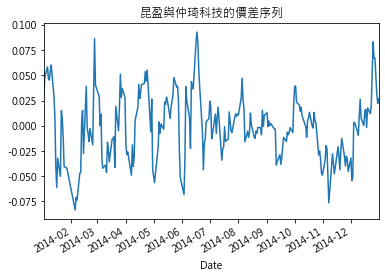

   Augmented Dickey-Fuller Results   
Test Statistic                 -5.647
P-value                         0.000
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [9]:
# 截取迴歸截距項
alpha=results.params[0]

# 截取迴歸係數
beta=results.params[1]

# 求殘差
spread=KYEflog-beta*Hitronflog-alpha
spread.head()

# 繪製殘差序列時序圖
spread.plot()
plt.title('昆盈與仲琦科技的價差序列')
plt.show()

# 價差序列單根檢定
# 因為殘差的均值為 0,所以 trend 設為 nc
adfSpread=ADF(spread,trend='nc')
print(adfSpread.summary().as_text())

根據檢定的結果，在 1% 顯著性水平下，我們可以拒絕虛無假設，即殘差序列不存在單根，殘差序列是定態的。透過上述分析，我們得知昆盈與仲琦科技股票的對數序列具有共整合關係。

圖 27.4：昆盈與仲琦科技的價差序列

### 27.3.2 配對交易策略的制定

**最小距離法**

運用最小距離法可以挑揀出股票對，計算形成期（Formation Period）內標準化的價格序列差 $\hat P_t^X-\hat P_t^Y$ 的平均值 $u$ 和標準差 $\sigma$。然後，選取交易期（Trading Period）進行交易。Gatev 等學者運用最小距離法選出股票對，設定交易訊號觸發點為 $u\pm 2\sigma$，交易期的適用期限為 6 個月。當交易期超過 6 個月以後，重新設定形成期和選取股票對。此處，我們設定交易期內價差超過 $u+1.2\sigma$ 或者 $u-1.2\sigma$ 時，將觸發交易訊號，進行交易。

當交易期的標準化價差又回復到均值 $u$ 附近時，反向操作平倉，從而賺取價差收
益。

1. 在形成期中計算昆盈與仲琦科技股票標準化價格序列差 SSD_pair，並求出價差的平均值 meanSSD_pair 和標準差 sdSSD_pair，並設定開倉、平倉條件。

Date
2014-01-02    0.000000
2014-01-03    0.021096
2014-01-06    0.033596
2014-01-07    0.018666
2014-01-08    0.016237
dtype: float64

Text(0.5, 1.0, '昆盈與仲琦科技標準化價差序列(形成期)')

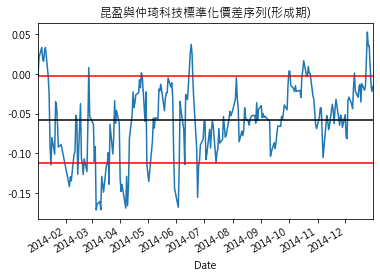

In [10]:
# 最小距離法交易策略
# 昆盈標準化價格
standardA=KYEf/KYEf[0]
# 仲琦科技標準化價格
standardB=Hitronf/Hitronf[0]
# 求昆盈與仲琦科技標凖化價格序列的價差
SSD_pair=standardA-standardB
SSD_pair.head()

meanSSD_pair=np.mean(SSD_pair)
sdSSD_pair=np.std(SSD_pair)
thresholdUp=meanSSD_pair+1.2*sdSSD_pair
thresholdDown=meanSSD_pair-1.2*sdSSD_pair
SSD_pair.plot()
plt.title('昆盈與仲琦科技標準化價差序列(形成期)')
plt.axhline(y=meanSSD_pair,color='black')
plt.axhline(y=thresholdUp,color='red')
plt.axhline(y=thresholdDown,color='red')
plt.show()

圖 27.4：昆盈與仲琦科技標準化價差序列（形成期）

2. 設定交易期（Tradin Period）時間，選取交易期資料，搜尋配對交易開倉和平倉位點。當價差上穿 $u+1.2\sigma$ 線時，反向開倉，當價差線回復到均線附近時，進行平倉。當價差線下穿 $u-1.2\sigma$ 線時，正向開倉，當價差線再次回復到均線附近時，平倉。

count    116.000000
mean      -0.019752
std        0.036222
min       -0.108388
25%       -0.045018
50%       -0.025420
75%        0.005482
max        0.079424
dtype: float64

Text(0.5, 1.0, '交易期價差序列')

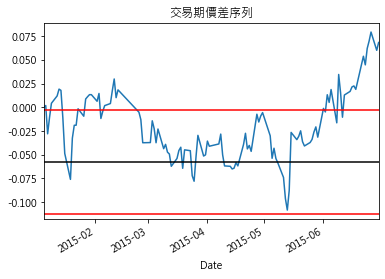

In [11]:
tradStart='2015-01-01'
tradEnd='2015-06-30'

KYEt=KYE[tradStart:tradEnd].Close
Hitront=Hitron[tradStart:tradEnd].Close

def spreadCal(priceX,priceY):
    data = pd.concat([priceX,priceY],axis=1).dropna()
    data.columns=['X','Y']
    standardX=data.X/data.X[0]
    standardY=data.Y/data.Y[0]
    spread=standardX-standardY
    return(spread)

TradSpread=spreadCal(KYEt,Hitront)
TradSpread.describe()

#繪製價差序列圖
TradSpread.plot()
plt.title('交易期價差序列')
plt.axhline(y=meanSSD_pair,color='black')
plt.axhline(y=thresholdUp,color='red')
plt.axhline(y=thresholdDown,color='red')
plt.show()

圖 27.6：昆盈股票於仲琦科技價差序列（交易期）

從圖 27.6 中可以看出，價差序列多在 1.2 倍標準差範圍內，從 2015 年 1 月 1 日至 2015 年 6 月 30 日，價差序列向上突破 1.2 倍標準差線三次，向下突破 1.2 倍標準差線 0 次，共有 3 次開倉機會，且價差序列比較穩定，開倉後均有平倉機會。

**共整合模型（Cointegration Model）**

運用共整合檢定選取的股票對，選取新的交易期，設形成期的定價差序列為：

$$\mathit{Spread}_t=\log(P_t^Y)-[\hat\alpha+\hat\beta\log(P_t^X)]$$

其中 $P_t^X$、$P_t^Y$ 是 $X$、$Y$ 股票的對數價格：$\hat\alpha$ 和 $\hat\beta$ 在形成期對 $\log(P_t^Y)$、$\log(P_t^X)$ 進行線性迴歸得到的係數值。根據 $\hat\alpha$ 和$\hat\beta$，我們可以計算形成期價差 $\mathit{Spread}_t$ 的均值 $u$ 和檩準差 $\sigma$，選取均值 $u$ 加減一定倍數 $\sigma$ 作為交易期價差的臨界值。，當交易期的價差超過 $u+1.2\sigma$ 時，進行開倉。當交易期的價差又回覆到 $u$ 附近時，進行平倉。當 $\sigma$ 的倍數設定較小時，會頻繁觸發交易訊號，但是賺取的收益較小。當 $\sigma$ 的倍數設定較大時，會賺取較高收益，然而觸發信號則相對較少。

0.03891813451927648

-0.038918134519294094

count    116.000000
mean      -0.014032
std        0.030794
min       -0.094471
25%       -0.035892
50%       -0.017570
75%        0.006555
max        0.070554
Name: Close, dtype: float64

Text(0.5, 1.0, '交易期價差序列(共整合配對)')

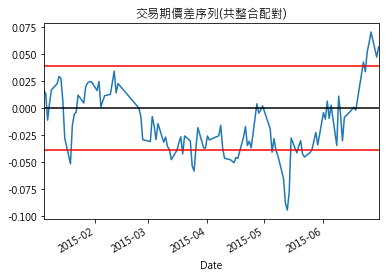

In [12]:
spreadf=KYEflog-beta*Hitronflog-alpha
mu=np.mean(spreadf)
sd=np.std(spreadf)
mu+1.2*sd

mu-1.2*sd

# 交易期
CoSpreadT=np.log(KYEt)-beta*np.log(Hitront)-alpha
CoSpreadT.describe()

CoSpreadT.plot()
plt.title('交易期價差序列(共整合配對)')
plt.axhline(y=mu,color='black')
plt.axhline(y=mu+1.2*sd,color='red')
plt.axhline(y=mu-1.2*sd,color='red')
plt.show()

圖 27.7：昆盈與仲琦科技共整合配對價差序列圖

對比圖 27.7 和圖 27.6，同樣應用仲琦科技和昆盈股票進行配對交易，運用最小距離法和共整合關係模型進行配對交易策略，釋放出的交易訊號買賣點有所不同。

## 27.4 建構 PairTrading 類別

Python 是一種物件導向的語言，我們可以建構各種各樣的類別來完成我們所需要工作。對於上文中進行配對的程式碼，我們可以將其撰寫為一個類別。這樣，在以後需要的時候，就可以隨時使用該類別，而不需要再重新撰寫上面的那些程式碼。

In [13]:
import pandas as pd
import numpy as np
from arch.unitroot import ADF
import statsmodels.api as sm
class PairTrading:
    def SSD(self,priceX,priceY):
        if priceX is None or priceY is None:
            print('缺少價格序列.')
        standardX=priceX/priceX[0]
        standardY=priceY/priceY[0]
        SSD=np.sum((standardY-standardX)**2)
        return(SSD)
    def SSDSpread(self,priceX,priceY):
        if priceX is None or priceY is None:
            print('缺少價格序列.')
        standardX=priceX/priceY[0]
        standardY=priceY/priceY[0]
        spread=standardY-standardX
        return(spread)
    def cointegration(self,priceX,priceY):
        if priceX is None or priceY is None:
            print('缺少價格序列.')
        priceX=np.log(priceX)
        priceY=np.log(priceY)
        results=sm.OLS(priceY,sm.add_constant(priceX)).fit()
        resid=results.resid
        adfSpread=ADF(resid)
        if adfSpread.pvalue>=0.05:
            print('''交易價格不具有共整合關係.
            P-value of ADF test: %f
            Coefficients of regression:
            Intercept：%f
            Beta：%f
             ''' % (adfSpread.pvalue, results.params[0], results.parms[1]))
            return(None)
        else:
            print('''交易價格具有共整合關係.
            P-value of ADF test: %f
            Coefficients of regression:
            Intercept：%f
            Beta：%f
             ''' %(adfSpread.pvalue, results.params[0], results.params[1]))
            return(results.params[0], results.params[1])
    def CointegrationSpread(self,priceX,priceY,formStart,formEnd,tradeStart,tradeEnd):
        if priceX is None or priceY is None:
            print('缺少價格序列.')
        formX=priceX[formStart:formEnd]
        formY=priceY[formStart:formEnd]
        tradeX=priceX[tradeStart:tradeEnd]
        tradeY=priceY[tradeStart:tradeEnd]
        coefficients=self.cointegration(formX,formY)
        if coefficients is None:
            print('未形成共整合關係，無法配對.')
        else:
            spread=(np.log(tradeY)-coefficients[0]-coefficients[1]*np.log(tradeX))
            return(spread)
    def calBound(self,priceX,priceY,method,formStart,formEnd,width=1.5):
        formX=priceX[formStart:formEnd]
        formY=priceY[formStart:formEnd]
        if method=='SSD':
            spread=self.SSDSpread(formX,formY)
            mu=np.mean(spread)
            sd=np.std(spread)
            UpperBound=mu+width*sd
            LowerBound=mu-width*sd
            return(UpperBound,LowerBound)
        elif method=='Cointegration':
            spread=self.CointegrationSpread(priceX,priceY,formStart,formEnd,formStart,formEnd)
            mu=np.mean(spread)
            sd=np.std(spread)
            UpperBound=mu+width*sd
            LowerBound=mu-width*sd
            return(UpperBound,LowerBound)
        else:
            print('不存在該方法. 請選擇"SSD"或是"Cointegration".')

現在我們使用上述建構的類別 PairTrading，來快速計算仲琦科技與昆盈的最小距離、價差序列、共整合配對係數、共整合配對價差以及交易期價差的臨界值。

In [14]:
formStart = '2014-01-01'
formEnd = '2015-01-01'
tradeStart = '2015-01-01'
tradeEnd = '2015-06-30'
priceA= Hitron.Close
priceB=KYE.Close
priceAf=priceA[formStart:formEnd]
priceBf=priceB[formStart:formEnd]
priceAt=priceA[tradeStart:tradeEnd]
priceBt=priceB[tradeStart:tradeEnd]
pt=PairTrading()

# SSD 的結果與前面結果（dis）一致
SSD=pt.SSD(priceAf,priceBf)
SSD

# 形成期 SSD spread 結果與前面（SSD_pair）一致
SSDspread=pt.SSDSpread(priceAf,priceBf)
SSDspread.describe()

SSDspread.head()

# 共整合關係之係數與前文（alpha beta）一致
coefficients=pt.cointegration(priceAf,priceBf)

coefficients

alpha

beta

# 形成期共整合配對後價差序列與前文（spread）一致
CoSpreadF=pt.CointegrationSpread(priceA,priceB,formStart,formEnd,formStart,formEnd)

CoSpreadF.head()

# 交易期價差序列與前文結果（CospreadT）一致
CoSpreadTr=pt.CointegrationSpread(priceA,priceB,formStart,formEnd,tradeStart,tradeEnd)

CoSpreadTr.describe()

# 根據形成期共整合配對後價差序列得到的臨界值與前文 (mu+1.2*sd,mu-1.2*sd) 一致
bound=pt.calBound(priceA,priceB,'Cointegration',formStart,formEnd,width=1.2)

bound

1.3364442848421572

count    248.000000
mean      -0.480944
std        0.084270
min       -0.704871
25%       -0.531280
50%       -0.474690
75%       -0.421920
max       -0.292264
Name: Close, dtype: float64

Date
2014-01-02   -0.375358
2014-01-03   -0.349570
2014-01-06   -0.332378
2014-01-07   -0.354346
2014-01-08   -0.359121
Name: Close, dtype: float64

交易價格具有共整合關係.
            P-value of ADF test: 0.000001
            Coefficients of regression:
            Intercept：0.148857
            Beta：0.813755
             


(0.14885693760867247, 0.813754701172193)

0.14885693760867247

0.813754701172193

交易價格具有共整合關係.
            P-value of ADF test: 0.000001
            Coefficients of regression:
            Intercept：0.148857
            Beta：0.813755
             


Date
2014-01-02    0.029188
2014-01-03    0.047983
2014-01-06    0.058349
2014-01-07    0.046629
2014-01-08    0.045294
Name: Close, dtype: float64

交易價格具有共整合關係.
            P-value of ADF test: 0.000001
            Coefficients of regression:
            Intercept：0.148857
            Beta：0.813755
             


count    116.000000
mean      -0.014032
std        0.030794
min       -0.094471
25%       -0.035892
50%       -0.017570
75%        0.006555
max        0.070554
Name: Close, dtype: float64

交易價格具有共整合關係.
            P-value of ADF test: 0.000001
            Coefficients of regression:
            Intercept：0.148857
            Beta：0.813755
             


(0.038918134519276594, -0.03891813451929398)

### 27.5 Python 實測配對交易交易策略

在這一小節中，我們將運用仲琦科技和昆盈股票的交易資料自行設計配對交易策略，這一次我們將 2014 年 1 月 1 日到 2014 年 12 月 31 日作為配對形成期，2015 年 1 月 1 日到 2015 年 6 月 30 日作為交易期。用 Python 實作配對交易策略大致有以下 4 個步驟。

1. 在形成期內，將仲琦科技和昆盈兩支股票的對數價格進行共整合檢定。

2. 找出配對比例 beta 和配對價差，計算價差的平均值和標準差。

3. 在交易期內，設定 $u\pm1.5\sigma$ 和 $u\pm0.2\sigma$ 為開倉與平倉的臨界值，將 $u\pm2.5\sigma$ 視為共整合關係可能破裂強制平倉的臨界值，具體交易規則如下：

   * 當價差上穿 $u+1.5\sigma$ 時，做空配對股票，反向建倉（賣出昆盈股票，同時買入仲琦科技股票，仲琦科技與昆盈股票資金比值為 beta）；

   * 當價差下穿 $u+0.2\sigma$ 之間時，做多配對股票，反向平倉；

   * 當價差下穿 $u-1.5\sigma$ 時，做多配對股票，正向建倉（買入昆盈股票，同時賣出仲琦科技股票，仲琦科技與昆盈股票資金比值為 beta）；

   * 當價差又回覆到 $u-0.2\sigma$ 上方時，做空配對股票，正向平倉；

   * 當價差突破 $u\pm2.5\sigma$ 時，及時平倉。

4. 配對交易策略績效評價。

接下來，我們用 Python 撰寫程式碼，對昆盈和仲琦科技股票進行配對交易策略實測。經過前面的分析，我們已經完成兩個股票的共整合檢定以及找到價差，接著計算形成期價差的平均值和標準差。

In [15]:
mu=np.mean(CoSpreadF)
sd=np.std(CoSpreadF)

然後，我們來構造開倉平倉區間。

Text(0.5, 1.0, '交易期價差序列（共整合配對）')

Date
2015-01-05    1
2015-01-06    1
2015-01-07   -1
2015-01-08    0
2015-01-09    1
Name: Close, dtype: int64

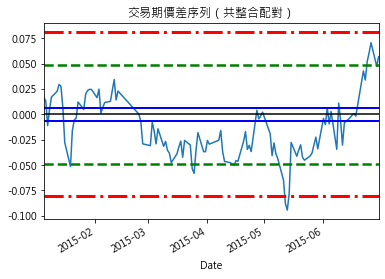

In [16]:
# 繪製價差區間圖
CoSpreadTr.plot()
plt.title('交易期價差序列（共整合配對）')
plt.axhline(y=mu,color='black')
plt.axhline(y=mu+0.2*sd,color='blue',ls='-',lw=2)
plt.axhline(y=mu-0.2*sd,color='blue',ls='-',lw=2)
plt.axhline(y=mu+1.5*sd,color='green',ls='--',lw=2.5)
plt.axhline(y=mu-1.5*sd,color='green',ls='--',lw=2.5)
plt.axhline(y=mu+2.5*sd,color='red',ls='-.',lw=3)
plt.axhline(y=mu-2.5*sd,color='red',ls='-.',lw=3)

# 構造開倉平倉區間
level=(float('-inf'),mu-2.5*sd,mu-1.5*sd,mu-0.2*sd,mu+0.2*sd,mu+1.5*sd,float('inf'))
prcLevel=pd.cut(CoSpreadTr,level,labels=False)-3
prcLevel.head()

圖 27.8：交易期價差序列

5. 根據開倉平倉點制定交易策略，具體交易規則為：

   * 當價差上穿 $u+1.5\sigma$ 時，做空配對股票，反向建倉（賣出昆盈股票，同時買入仲琦科技股票，仲琦科技與昆盈股票資金比值為 beta）；

   * 當價差下穿 $u+0.2\sigma$ 之間時，做多配對股票，反向平倉；

   * 當價差下穿 $u-1.5\sigma$ 時，做多配對股票，正向建倉（買入昆盈股票，同時賣出仲琦科技股票，仲琦科技與昆盈股票資金比值為 beta）；

   * 當價差又回覆到 $u-0.2\sigma$ 上方時，做空配對股票，正向平倉；

   * 當價差突破 $u+\pm2.5\sigma$ 時，及時平倉。然後，撰寫程式碼來模擬開倉平倉的過程。

In [17]:
# 構造交易訊號函數
def TradeSig(prcLevel):
    n=len(prcLevel)
    signal=np.zeros(n)
    for i in range(1,n):
        if prcLevel[i-1]==1 and prcLevel[i]==2:
            signal[i]=-2
        elif prcLevel[i-1]==1 and prcLevel[i]==0:
            signal[i]=2
        elif prcLevel[i-1]==2 and prcLevel[i]==3:
            signal[i]=3
        elif prcLevel[i-1]==-1 and prcLevel[i]==-2:
            signal[i]=1
        elif prcLevel[i-1]==-1 and prcLevel[i]==0:
            signal[i]=-1
        elif prcLevel[i-1]==-2 and prcLevel[i]==-3:
            signal[i]=-3
    return(signal)

signal=TradeSig(prcLevel)

position=[signal[0]]
ns=len(signal)

# 記錄倉位情況
for i in range(1,ns):
    position.append(position[-1])
    if signal[i]==1:
        position[i]=1
    elif signal[i]==-2:
        position[i]=-1
    elif signal[i]==-1 and position[i-1]==1:
        position[i]=0
    elif signal[i]==2 and position[i-1]==-1:
        position[i]=0
    elif signal[i]==3:
        position[i]=0
    elif signal[i]==-3:
        position[i]=0

position=pd.Series(position,index=CoSpreadT.index)
position.tail()

Date
2015-06-24   -1.0
2015-06-25   -1.0
2015-06-26   -1.0
2015-06-29   -1.0
2015-06-30   -1.0
dtype: float64

本策略採取資金中和的策略，我們設定初始資金為 10000 元[<sup>7</sup>](#fn7)，每次建倉時，建倉 10 張的昆盈股票，仲琦科技與昆盈股票資金比值為 beta 來建立仲琦科技的倉位。模擬交易賬戶建立過程如下：

In [18]:
def TradeSim(priceX,priceY,position):
    n=len(position)
    shareY=10000*position
    shareX=[(-beta)*shareY[0]*priceY[0]/priceX[0]]
    cash=[10000]
    for i in range(1,n):
        shareX.append(shareX[i-1])
        cash.append(cash[i-1])
        if position[i-1]==0 and position[i]==1:
            shareX[i]=(-beta)*shareY[i]*priceY[i]/priceX[i]
            cash[i]=cash[i-1]-(shareY[i]*priceY[i]+shareX[i]*priceX[i])
        elif position[i-1]==0 and position[i]==-1:
            shareX[i]=(-beta)*shareY[i]*priceY[i]/priceX[i]
            cash[i]=cash[i-1]-(shareY[i]*priceY[i]+shareX[i]*priceX[i])
        elif position[i-1]==1 and position[i]==0:
            shareX[i]=0
            cash[i]=cash[i-1]+(shareY[i-1]*priceY[i]+shareX[i-1]*priceX[i])
        elif position[i-1]==-1 and position[i]==0:
            shareX[i]=0
            cash[i]=cash[i-1]+(shareY[i-1]*priceY[i]+shareX[i-1]*priceX[i])
    cash = pd.Series(cash,index=position.index)
    shareY=pd.Series(shareY,index=position.index)
    shareX=pd.Series(shareX,index=position.index)
    asset=cash+shareY*priceY+shareX*priceX
    account=pd.DataFrame({'Position':position,'ShareY':shareY,'ShareX':shareX,'Cash':cash,'Asset':asset})
    return(account)

account1=TradeSim(Hitront,KYEt,position)
print(account1.tail())

account1.iloc[-1]['Asset']

            Position   ShareY       ShareX          Cash         Asset
Date                                                                  
2015-06-24      -1.0 -10000.0  6206.494189  36221.809267  18323.636050
2015-06-25      -1.0 -10000.0  6206.494189  36221.809267  17513.311340
2015-06-26      -1.0 -10000.0  6206.494189  36221.809267  16554.726863
2015-06-29      -1.0 -10000.0  6206.494189  36221.809267  18785.817677
2015-06-30      -1.0 -10000.0  6206.494189  36221.809267  17885.817677


17885.81767659742

<span id="fn7"><sup>7</sup> 這個初始資金的設置沒有考慮融資融券的保證金，只是為了突出獲利的部分</span>

繪製資產賬戶圖：

Text(0.5, 1.0, '配對交易賬戶')

Text(0, 0.5, 'asset')

Text(0, 0.5, 'share')

Text(0.5, 1.0, '配對交易倉位情況')

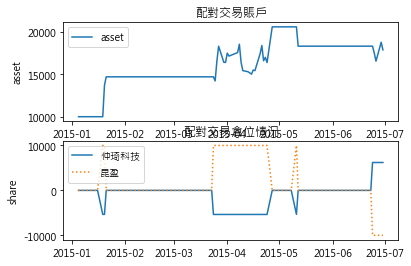

In [19]:
plt.subplot(211)
plt.plot(account1.Asset,label='asset')
plt.title('配對交易賬戶')
plt.legend()
plt.ylabel('asset')

plt.subplot(212)
plt.plot(account1.ShareX,label='仲琦科技')
plt.plot(account1.ShareY,':',label='昆盈')
plt.ylabel('share')
plt.title('配對交易倉位情況')
plt.legend()
plt.show()

分析圖 27.9 中曲線，觀察交易倉位曲線圖，可以看出從 2015 年 1 月 1 日到 2015 年 6 月底這 6 個月內，配對交易訊號觸發不多（共 4 次）。再觀察資產曲線圖，配對資產整體上呈現上升趨勢，資產由 10000 元轉變成 17885 元左右。整體上而言，對仲琦科技和昆盈兩支股票進行配對交易的策略績效表現不錯。